In [67]:
import scanpy as sc
import os

import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import matplotlib as mp
from adjustText import adjust_text
from matplotlib.colors import LogNorm

In [3]:
from scooby.utils.plotting import plot_cells_pseudotime

In [4]:
data_path = 'tmp'

## Panel B

In [5]:
ad_outputs = sc.read(os.path.join('/s/project/QNA/scborzoi/neurips_bone_marrow/eval_fixed/test_val_genes.h5ad')) 

In [6]:
adata = sc.read(os.path.join(data_path,  'bmmc_multiome_multivi_neurips21_curated_new_palantir_fixed_GEX.h5ad'))

In [7]:
sc.pp.normalize_total(ad_outputs, key_added='size_factor')

### Order cell types

In [8]:
old_order = ad_outputs.obs['l2_cell_type']

In [9]:
new_order= [
    "HSC",  
    'MK/E prog', 
    'Proerythroblast', 
    'Erythroblast', 
    'Normoblast', 
    'G/M prog', 
    'CD14+ Mono',
    'CD16+ Mono',  
    'Early Lymphoid',
    'Transitional B', 
    'Naive CD20+ B', 
    'B1 B',  
    'CD4+ T naive',
    'CD8+ T naive', 
    'CD4+ T activated',
    'CD8+ T activated',
    'NK',
    'ILC', 
    'Plasma',
    'cDC2',
    'pDC']

In [10]:
ad_outputs.obs['l2_cell_type'] = pd.Categorical(ad_outputs.obs['l2_cell_type'], categories = new_order, ordered = True)
ad_outputs = ad_outputs[ad_outputs.obs.sort_values('l2_cell_type').index, :]

In [11]:
adata.obs['l2_cell_type'] = pd.Categorical(adata.obs['l2_cell_type'], categories = new_order, ordered = True)
adata = adata[adata.obs.sort_values('l2_cell_type').index, :]

In [12]:
# Get the index mapping from the original to the reordered categories
indexer = old_order.cat.categories.get_indexer(ad_outputs.obs['l2_cell_type'].cat.categories)

### Heatmap

In [13]:
ad_outputs.obs['l2_cell_type'] = pd.Categorical(ad_outputs.obs['l2_cell_type'], categories = new_order, ordered = True)
ad_outputs = ad_outputs[ad_outputs.obs.sort_values('l2_cell_type').index, :]

/scratch/tmp/martensl/ipykernel_3730624/1301471573.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_outputs.obs['l2_cell_type'] = pd.Categorical(ad_outputs.obs['l2_cell_type'], categories = new_order, ordered = True)


In [14]:
adata.obs['l2_cell_type'] = pd.Categorical(adata.obs['l2_cell_type'], categories = new_order, ordered = True)
adata = adata[adata.obs.sort_values('l2_cell_type').index, :]

/scratch/tmp/martensl/ipykernel_3730624/130172632.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['l2_cell_type'] = pd.Categorical(adata.obs['l2_cell_type'], categories = new_order, ordered = True)


In [15]:
new_cell_marker_genes = ["GATA2", "MEIS1","AUTS2", "DIAPH3", "ANK1",  "SLC25A37",  "LYN", "FCN1","CST3",   "OSBPL10",   "BLK", "BCL2","AFF3",  "IGKC", "THEMIS",'CD7',  "GNLY",'CEBPD'] 

In [16]:
val_genes = pd.read_csv(os.path.join(data_path, 'borzoi_training_data_fixed', 'val_genes.csv'), index_col=0)
test_genes = pd.read_csv(os.path.join(data_path, 'borzoi_training_data_fixed', 'test_genes.csv'), index_col=0)

In [17]:
ad_outputs.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']

/scratch/tmp/martensl/ipykernel_3730624/675888315.py:1: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  ad_outputs.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']


In [18]:
ad_outputs.uns['l2_cell_type_colors'] =  np.array(ad_outputs.uns['l2_cell_type_colors'])[indexer.tolist()].tolist()

/scratch/tmp/martensl/ipykernel_3730624/3998257749.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/tmp/martensl/ipykernel_3730624/3998257749.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


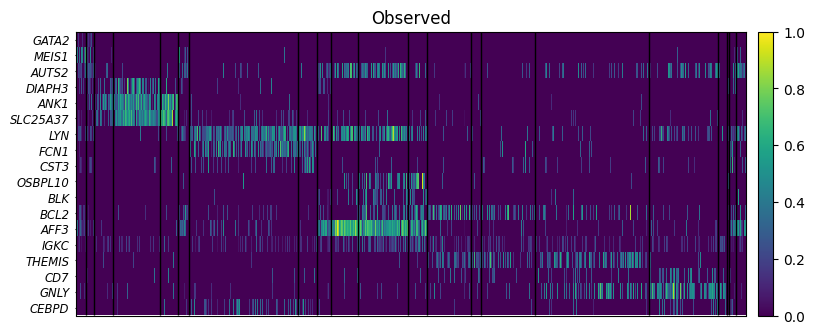

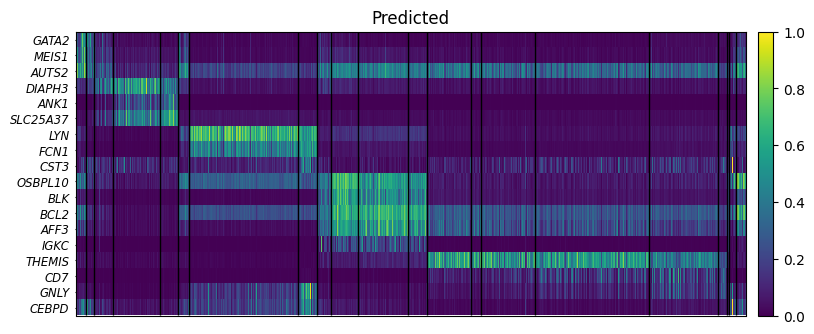

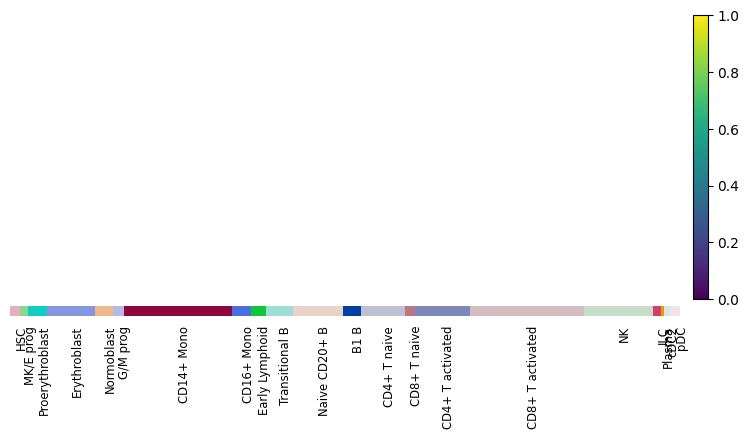

In [20]:
ax = sc.pl.heatmap(adata, new_cell_marker_genes, groupby= ['l2_cell_type'], swap_axes = True, show=False, figsize = (9,4), cmap='viridis', standard_scale = 'var', show_gene_labels=True) 
ax['heatmap_ax'].set_title('Observed')
ax['groupby_ax'].remove()
xticklabels = ax['heatmap_ax'].get_yticklabels()  

for label in xticklabels:
    label.set_fontstyle('italic')

plt.tight_layout()
# plt.savefig('figures/Figure2/heatmap_observed.svg', bbox_inches='tight', dpi=300)
# plt.savefig('figures/Figure2/heatmap_predicted.png', bbox_inches='tight', dpi=300)

ax = sc.pl.heatmap(ad_outputs, new_cell_marker_genes, groupby= 'l2_cell_type', swap_axes = True, show = False, figsize = (9,4), cmap='viridis', standard_scale="var", show_gene_labels=True) 
ax['heatmap_ax'].set_title('Predicted')
ax['groupby_ax'].remove()
xticklabels = ax['heatmap_ax'].get_yticklabels()  

for label in xticklabels:
    label.set_fontstyle('italic')
plt.tight_layout()
# plt.savefig('figures/Figure2/heatmap_predicted.svg', bbox_inches='tight', dpi=300)
# plt.savefig('figures/Figure2/heatmap_predicted.png', bbox_inches='tight', dpi=300)

ax = sc.pl.heatmap(ad_outputs, new_cell_marker_genes, groupby= 'l2_cell_type', swap_axes = True, show = False, figsize = (9,4), cmap='viridis', standard_scale="var", show_gene_labels=True) 
ax['heatmap_ax'].remove()
ax['groupby_ax'].set_xlabel("")
plt.setp(ax['groupby_ax'].get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor");
# plt.savefig('figures/Figure2/colorbar.svg', bbox_inches='tight', dpi=300)

### Evaluation across gene

In [57]:
cell_type_index = pd.read_parquet(os.path.join(data_path,  'borzoi_training_data_fixed/celltype_fixed.pq'))
cell_type_index['size'] = cell_type_index['cellindex'].apply(lambda x: len(x))

In [58]:
cell_type_index['celltype'] = cell_type_index['celltype'].str.replace(' ', '_').replace(r"G/M_prog", "G+M_prog").replace("MK/E_prog", "MK+E_prog") #+ '_filtered'
cell_type_index = cell_type_index.sort_values('celltype')

In [48]:
all_outputs = torch.load(os.path.join(data_path, "eval_fixed/count_predicted_test_no_neighbor.pq"))
all_targets = torch.load(os.path.join(data_path, "eval_fixed/count_target_test_no_neighbor.pq"))

In [49]:
gene_names = pd.read_parquet(os.path.join(data_path, "eval_fixed/gene_names.pq")[0].tolist()

In [50]:
spearmanr = [
    scipy.stats.spearmanr(np.log2(all_outputs[:, i] + 1), 
                          np.log2(all_targets[:, i] + 1))[0] for i in range(all_outputs.shape[1])
]
pearsonr =  [
    scipy.stats.pearsonr (np.log2(all_outputs[:, i] + 1), 
                          np.log2(all_targets[:, i] + 1))[0] for i in range(all_outputs.shape[1])]

In [51]:
font_size=  12
mp.rcParams['axes.labelsize'] = font_size
mp.rcParams['axes.titlesize'] = font_size
mp.rcParams['legend.fontsize'] = font_size
mp.rcParams['xtick.labelsize'] = font_size
mp.rcParams['ytick.labelsize'] = font_size

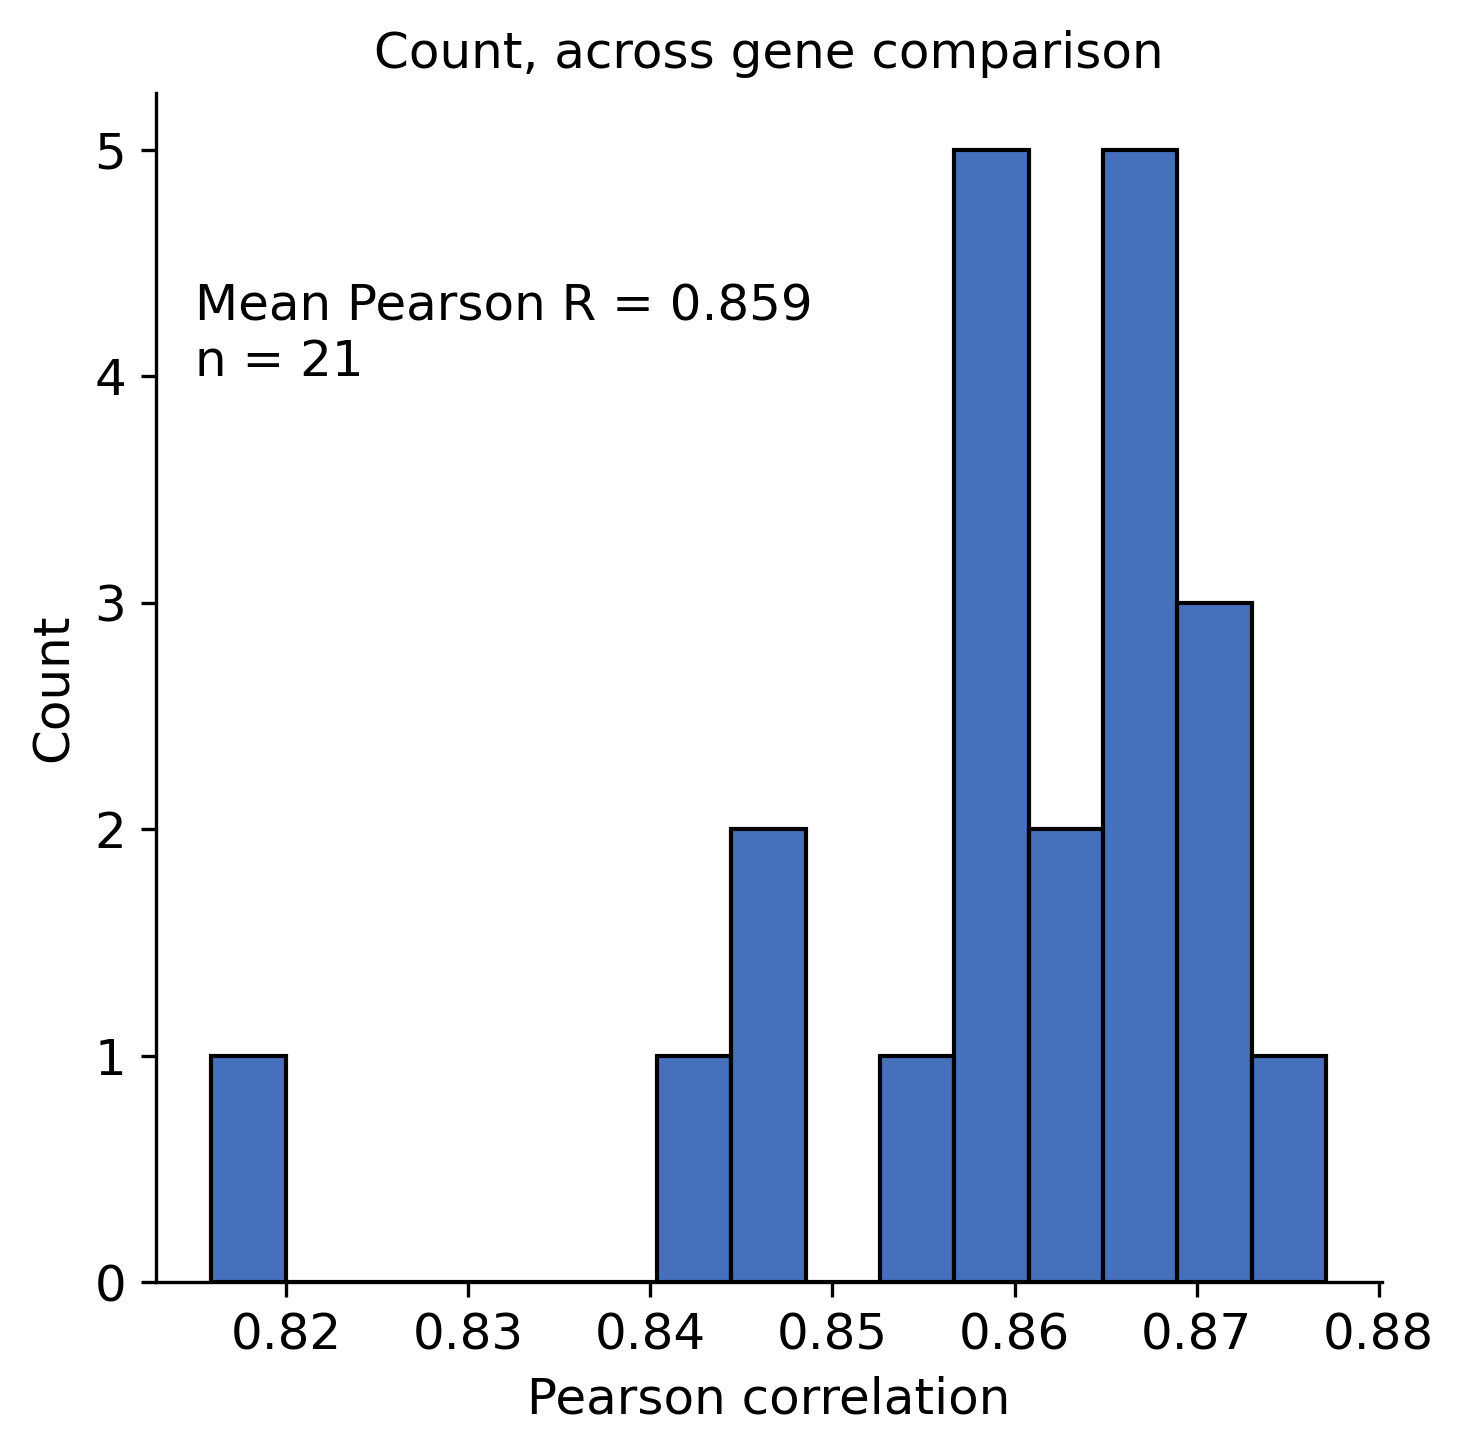

In [52]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.histplot(pearsonr, bins = 15, color='#0742A6')
ax.set_xlabel('Pearson correlation')
ax.set_title('Count, across gene comparison')
ax.text(0.815,4, f"Mean " + r"Pearson R"+ f" = {np.mean(pearsonr):.3f} \nn = {len(pearsonr)}", bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'), fontdict={'size' : 12})
plt.tight_layout()
sns.despine()
fig.set_dpi(300)
# fig.savefig('../figures/figures/Figure2/across_gene_histogram.png')

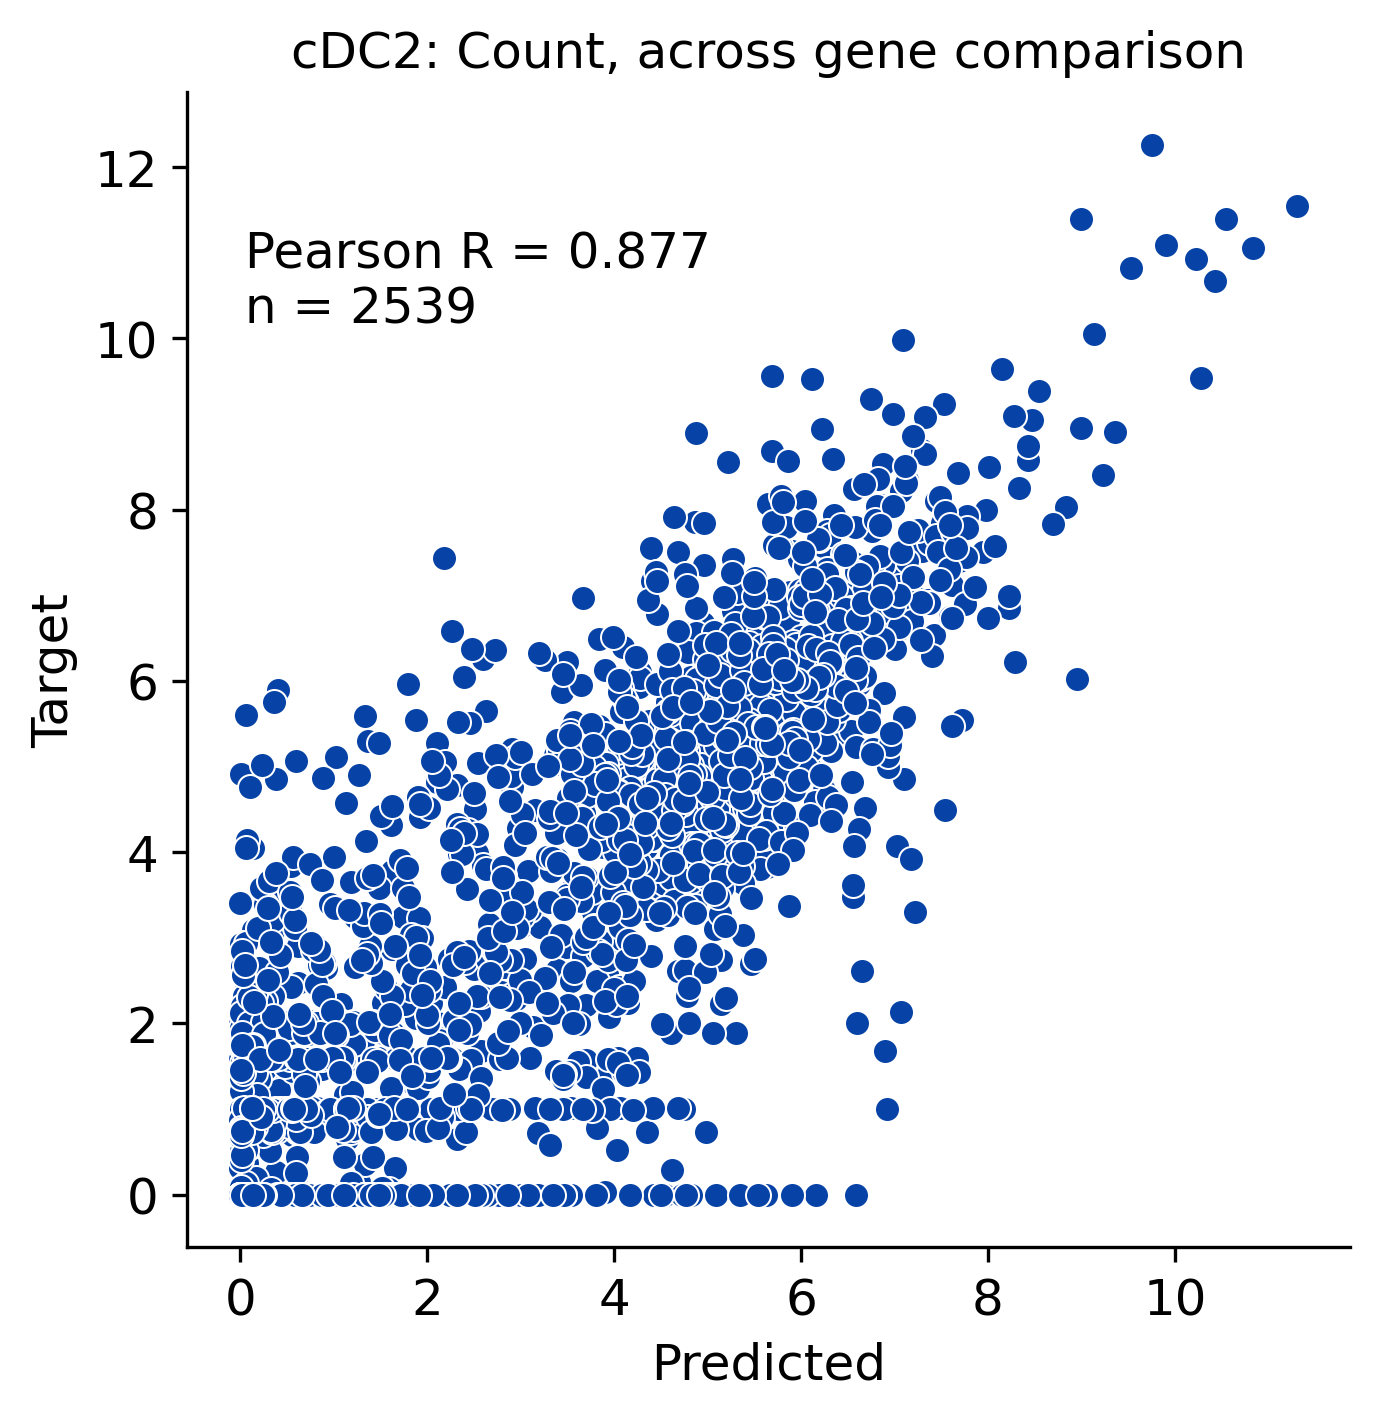

In [59]:
track = -2
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=np.log2((all_outputs[:, track]+1)), y=np.log2(all_targets[:, track]+1), color='#0742A6', ax=ax)
ax.text(0.05,0.8, r"Pearson R"+ f" = {pearsonr[track]:.3f}\nn = {len(all_outputs[:, track])}", 
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'), fontdict={'size' : 12},
        transform = ax.transAxes
)
plt.xlabel('Predicted')
plt.ylabel('Target')
sns.despine()
ct = cell_type_index.iloc[track]['celltype']
ax.set_title(f'{ct}: Count, across gene comparison')
fig.set_dpi(300)
# fig.savefig('../figures/figures/Figure2/cDC2_scatterplot.png')

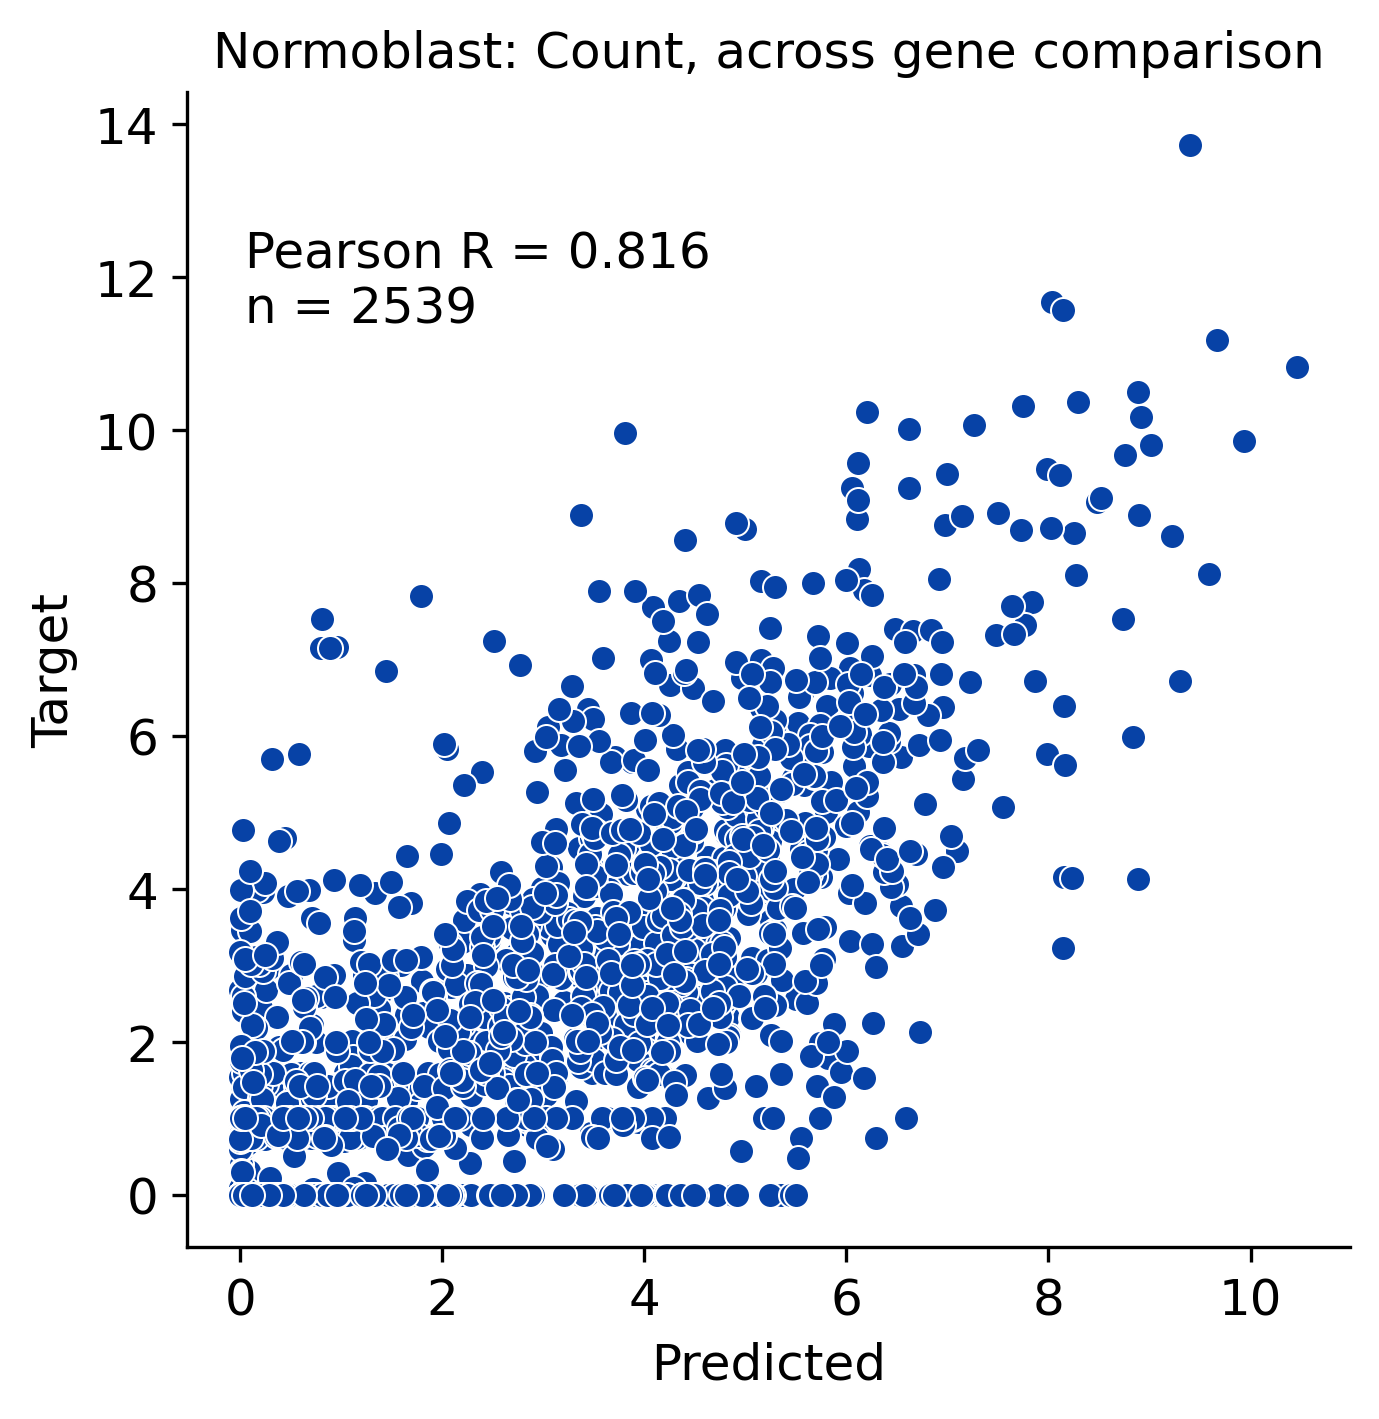

In [60]:
track = 15
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=np.log2((all_outputs[:, track]+1)), y=np.log2(all_targets[:, track]+1), color='#0742A6', ax=ax)
ax.text(0.05,0.8, r"Pearson R"+ f" = {pearsonr[track]:.3f}\nn = {len(all_outputs[:, track])}", 
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'), fontdict={'size' : 12},
        transform = ax.transAxes
)
plt.xlabel('Predicted')
plt.ylabel('Target')
sns.despine()
ct = cell_type_index.iloc[track]['celltype']
ax.set_title(f'{ct}: Count, across gene comparison')
fig.set_dpi(300)
# fig.savefig(f'../figures/figures/Figure2/{ct}_scatterplot.png')

### Evaluation across cells

In [61]:
# log2(x+1)
counts_predicted_log = np.log2(pd.DataFrame(all_outputs) + 1)  
# substract mean per gene across all cell types
counts_predicted_log = counts_predicted_log - counts_predicted_log.mean(axis=0)

#substract mean per cell type across all genes
counts_predicted_log = counts_predicted_log.subtract(counts_predicted_log.mean(axis=1), axis=0)

In [62]:
counts_target_log =np.log2(pd.DataFrame(all_targets) + 1)
counts_target_log = counts_target_log - counts_target_log.mean(axis=0)

counts_target_log = counts_target_log.subtract(counts_target_log.mean(axis=1), axis=0)

In [63]:
counts_predicted_log.index = gene_names
counts_predicted_log.columns = cell_type_index['celltype']

In [64]:
counts_target_log.index = gene_names
counts_target_log.columns = cell_type_index['celltype']

0    CD7
Name: NK, dtype: object
0    ANK1
Name: Normoblast, dtype: object


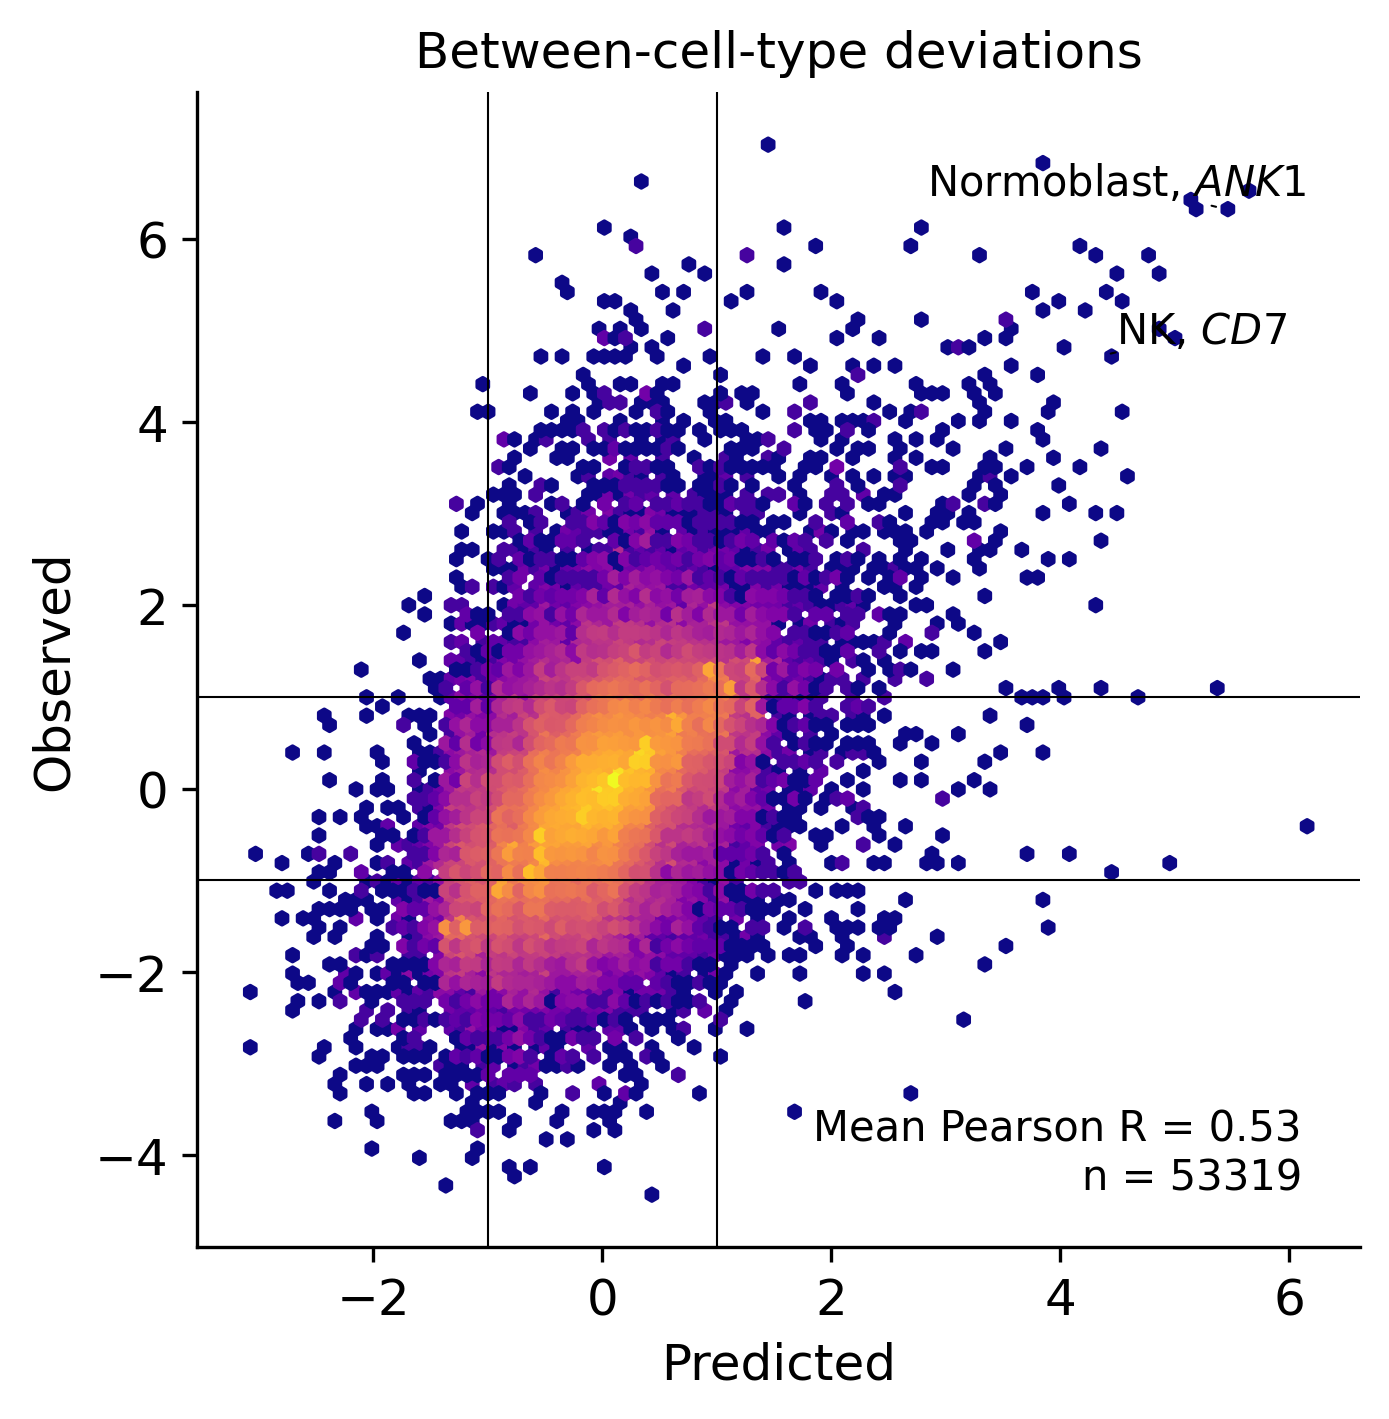

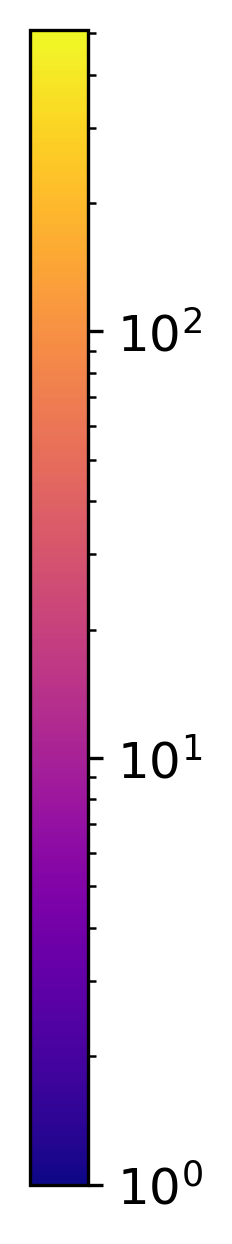

In [68]:

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
g=ax.hexbin(x=counts_predicted_log.values.ravel(), y=counts_target_log.values.ravel(), mincnt=1, cmap='plasma', norm=LogNorm())
ax.axvline(1, c='k', linewidth = font_size/24)
ax.axvline(-1,c='k', linewidth = font_size/24)
ax.axhline(1,c='k', linewidth = font_size/24)
ax.axhline(-1,c='k', linewidth = font_size/24)


p=scipy.stats.pearsonr(counts_predicted_log.values.ravel(), counts_target_log.values.ravel())[0]
plt.text(0.95,0.05, "Mean " + r"Pearson R"+ f" = {p:.2f}\nn = {len(counts_predicted_log.values.ravel())}", fontdict={'size' : 10}, transform=ax.transAxes, ha='right')
text = []
for ct, gene in counts_predicted_log.idxmax().to_frame().iterrows():
    if ct in ['Normoblast', 'NK']:
        name = ct.replace("_", " ")
        print(gene)
        text.append(ax.text(counts_predicted_log.loc[gene, ct].item(), y=counts_target_log.loc[gene, ct].item(), s=f"{name}, "+ "$\it{" + f"{gene.item()}" + "}$"))
adjust_text(text, 
            arrowprops=dict(arrowstyle='-', color='k', lw = 0.5) 
            );

ax.set_ylabel('Observed')
ax.set_title('Between-cell-type deviations')
ax.set_xlabel('Predicted')
sns.despine()
# fig.savefig('../figures/figures/Figure2/across_cells.png')

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
fig.colorbar(g, ax=ax)
fig.axes[0].remove()
# fig.savefig('../figures/figures/Figure2/across_cells_colorbar.png')

### Unseen cell type

In [ ]:
all_outputs = torch.load(os.path.join(data_path, "eval_fixed/no_neighbors_no_normoblasts_perf.pq"))
all_targets = torch.load(os.path.join(data_path, "eval_fixed/count_target_test_no_neighbor.pq"))

In [77]:
counts_predicted_log = np.log2(pd.DataFrame(all_outputs) + 1) 
counts_predicted_log = counts_predicted_log - counts_predicted_log.mean(axis=0)
counts_target_log = np.log2(pd.DataFrame(all_targets) + 1)
counts_target_log = counts_target_log - counts_target_log.mean(axis=0)
counts_predicted_log = counts_predicted_log.values
counts_target_log = counts_target_log.values

In [78]:
cell_type_index_new = cell_type_index.reset_index().copy()

In [81]:
pearsons = []
#cell_type_index_new = cell_type_index.reset_index()
for i, row in cell_type_index_new.iterrows():
    ct = row["celltype"]
    #print (i,ct, scipy.stats.pearsonr(counts_predicted_log[:,i].ravel(), counts_target_log[:, 15])[0])
    pearsons.append(scipy.stats.pearsonr(counts_predicted_log[:,i].ravel(), counts_target_log[:, 15])[0])

cell_type_index_new['normoblast perf, pearson when_imputed with celltype pred'] = pearsons

In [4]:
cell_type_index_new['celltype'] = cell_type_index_new['celltype'].str.replace('_', ' ').replace(r"G+M prog", "G/M prog").replace("MK+E prog", "MK/E prog")

In [9]:

adata = sc.read(os.path.join(data_path, 'bmmc_multiome_multivi_neurips21_curated_new_palantir_fixed_GEX.h5ad'))

In [10]:
color_map = dict(zip(adata.obs.l2_cell_type.cat.categories, adata.uns['l2_cell_type_colors']))

In [11]:
for k, v in color_map.items():
    color_map[k.replace('_', ' ').replace(r"G+M prog", "G/M prog").replace("MK+E prog", "MK/E prog")] = v

In [17]:
test = cell_type_index_new.set_index('celltype').join(pd.DataFrame.from_dict(color_map, orient= 'index').rename({0:'color'}, axis = 1)).reset_index().sort_values('normoblast perf, pearson when_imputed with celltype pred')

/scratch/tmp/hingerl/ipykernel_3670556/3094027066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(test.rename({"normoblast perf, pearson when_imputed with celltype pred" : "Val set: Normoblast count pearson, when imputed with cell type", "celltype" : "Cell type"}, axis = 1),y="Cell type",x="Val set: Normoblast count pearson, when imputed with cell type", palette = test['color'].values, ax= ax)
/scratch/tmp/hingerl/ipykernel_3670556/3094027066.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(test.rename({"normoblast perf, pearson when_imputed with celltype pred" : "Val set: Normoblast count pearson, when imputed with cell type", "celltype" : "Cell type"}, axis = 1),y="Cell type",x="Val set: Normoblast count pearson, w

(0.6, 0.8)

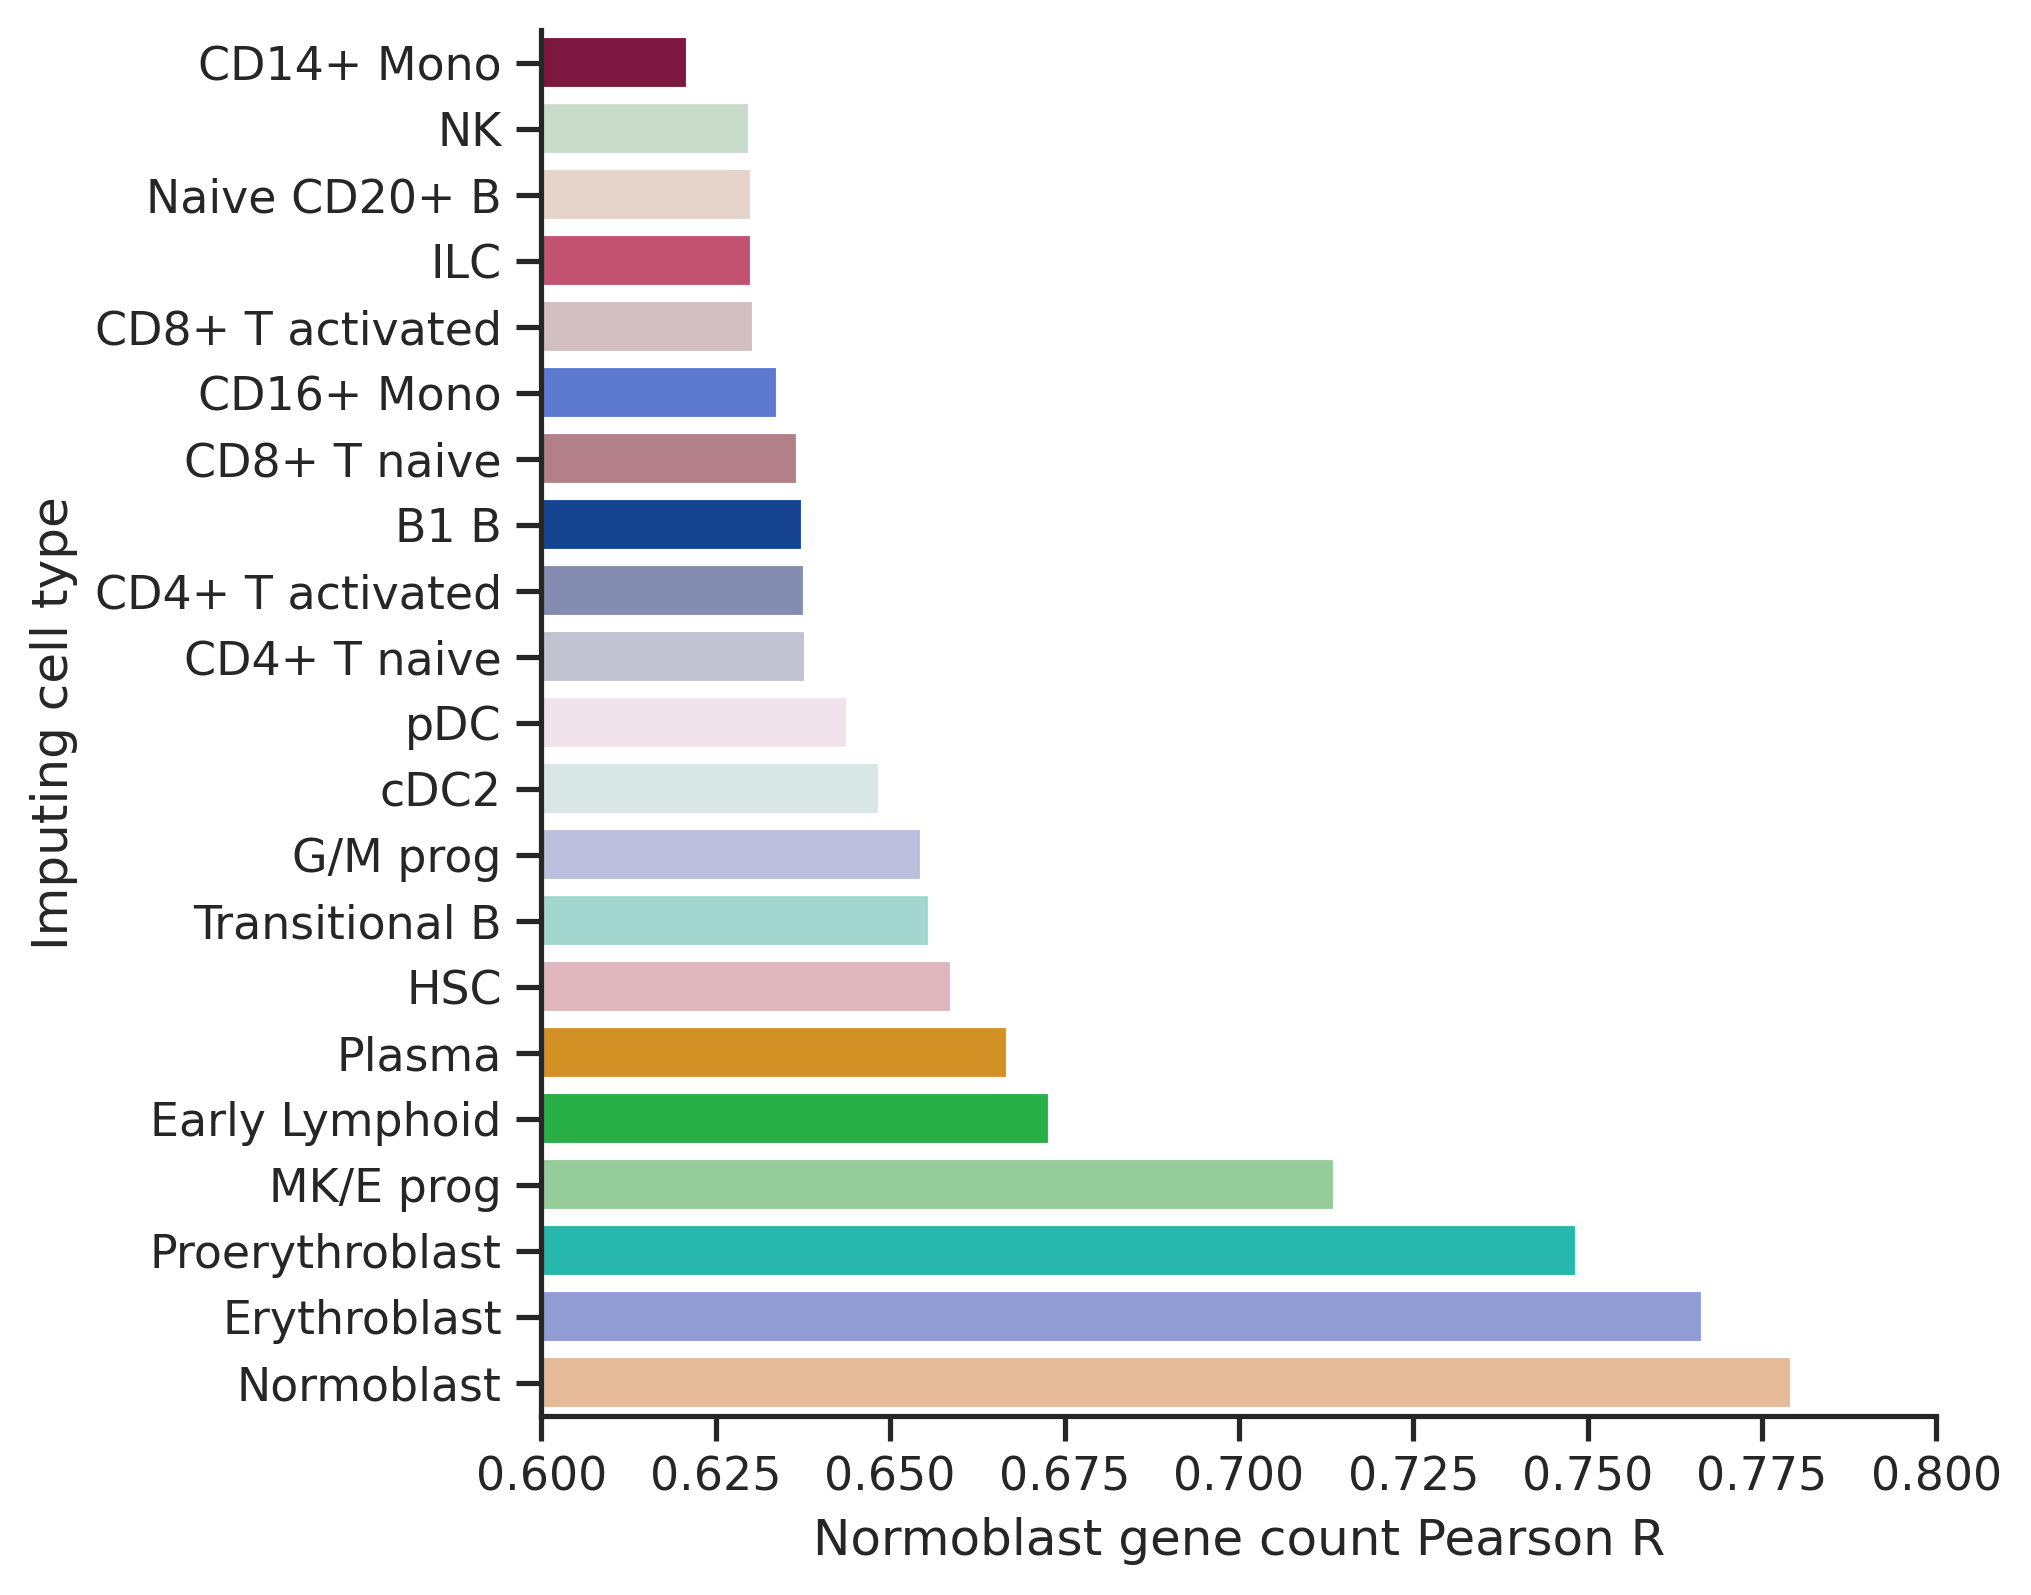

In [27]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(1,figsize=(6,6))
ax = sns.barplot(test.rename({"normoblast perf, pearson when_imputed with celltype pred" : "Val set: Normoblast count pearson, when imputed with cell type", "celltype" : "Cell type"}, axis = 1),y="Cell type",x="Val set: Normoblast count pearson, when imputed with cell type", palette = test['color'].values, ax= ax)
ax.set_xlabel("Normoblast gene count Pearson R")
ax.set_ylabel("Imputing cell type")
ax.figure.set_dpi(300)
ax.set_xlim(0.6,0.8)
#plt.savefig("Fig2F.svg",bbox_inches="tight")

### Plot lineages

In [37]:
ad_outputs = sc.read(os.path.join(data_path, 'eval_fixed/test_val_genes.h5ad'))
ad_outputs_norm = sc.read(os.path.join(data_path, 'eval_fixed/test_val_genes_no_normos.h5ad'))
ad_outputs.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']
ad_outputs_norm.uns['l2_cell_type_colors'] = adata.uns['l2_cell_type_colors']
sc.pp.normalize_total(ad_outputs)
sc.pp.normalize_total(ad_outputs_norm)

In [36]:
adata = sc.read(os.path.join(data_path,  'bmmc_multiome_multivi_neurips21_curated_new_palantir_fixed_GEX.h5ad'))

In [38]:
ct_colors = pd.Series(adata.uns['l2_cell_type_colors'], 
                     index=adata.obs['l2_cell_type'].values.categories)

In [39]:
# Lineage cells 
meta_lineage_cells = pd.Series(dtype=object)
# Erytrocyte lineage
meta_lineage_cells['Erythroblast'] = adata.obs_names[adata.obs['l2_cell_type'].isin(
    ['MK/E prog', 'HSC', 'Proerythroblast', 'Erythroblast', 'Normoblast'])]

In [40]:
genes = [ "HEMGN"]

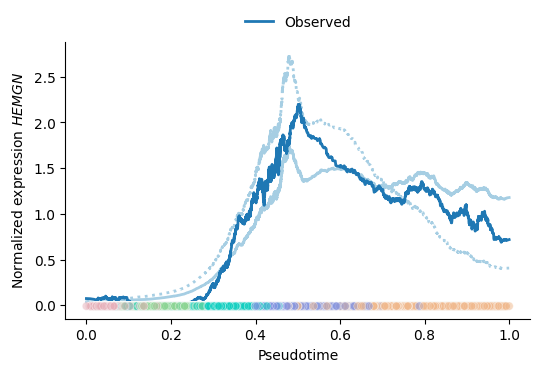

In [41]:
for i,gene in enumerate(genes):

    fig, ax_pred = plt.subplots(figsize=(3*2,1.8*2))
    ax_pred, sns_df = plot_cells_pseudotime(
        ad_outputs,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        #title=f"Predicted w Normoblast; Pearson R: {pcc}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False,
        linewidth=2, 
    )
    ax_pred, sns_df_norm = plot_cells_pseudotime(
        ad_outputs_norm,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        # title=f"Predicted w/o Normoblast; Pearson R: {pcc_norm}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False, 
        linewidth=2,
        linestyle=':'
        )
    ax_pred, sns_df_obs  = plot_cells_pseudotime(
        adata,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Observed", 
        ax=ax_pred, 
        color = '#1f78b4', 
        ct_color=None,
        scale= True,
        plot_cells=True,
        splines=False, 
        linewidth=2
        )
    sns.despine(fig)
    sns.move_legend(
    ax_pred, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)
    ax_pred.set_xlabel("Pseudotime")
    ax_pred.set_ylabel(r"Normalized expression $HEMGN$")
    # ax_pred.set_yticks([0,1])
    #fig.savefig('figures/Figure2/no_normoblast_HEMGN.png', dpi=300, bbox_inches='tight')
    break

In [42]:
pcc = np.round(scipy.stats.pearsonr(sns_df['pred_y'], sns_df_obs['pred_y'])[0], 3)

In [43]:
pcc_norm = np.round(scipy.stats.pearsonr(sns_df_norm['pred_y'], sns_df_obs['pred_y'])[0], 3) 

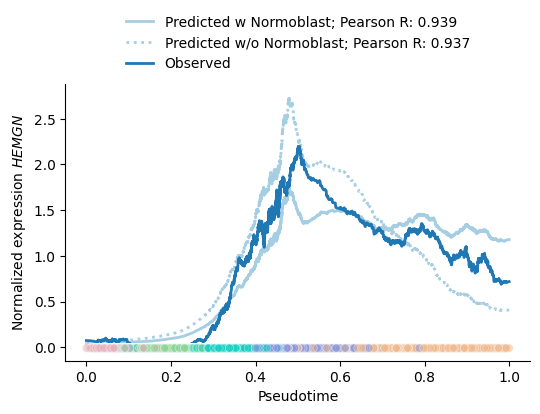

In [45]:
for i,gene in enumerate(genes):

    fig, ax_pred = plt.subplots(figsize=(3*2,1.8*2))
    ax_pred, sns_df = plot_cells_pseudotime(
        ad_outputs,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Predicted w Normoblast; Pearson R: {pcc}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False,
        linewidth=2, 
    )
    ax_pred, sns_df_norm = plot_cells_pseudotime(
        ad_outputs_norm,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Predicted w/o Normoblast; Pearson R: {pcc_norm}", 
        ax=ax_pred, 
        color = '#a6cee3', 
        ct_color=None,
        scale= True,
        plot_cells=False,
        splines=False, 
        linewidth=2,
        linestyle=':'
        )
    ax_pred, sns_df_obs  = plot_cells_pseudotime(
        adata,
        meta_lineage_cells[['Erythroblast']], 
        gene, 
        layer=None, 
        title=f"Observed", 
        ax=ax_pred, 
        color = '#1f78b4', 
        ct_color=None,
        scale= True,
        plot_cells=True,
        splines=False, 
        linewidth=2
        )
    sns.despine(fig)
    sns.move_legend(
    ax_pred, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)
    ax_pred.set_xlabel("Pseudotime")
    ax_pred.set_ylabel(r"Normalized expression $HEMGN$")
    # ax_pred.set_yticks([0,1])
    #fig.savefig('figures/Figure2/no_normoblast_HEMGN.png', dpi=300, bbox_inches='tight')
    break